In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

file_path = '../input/Immunotherapy.xlsx'
data = pd.read_excel(file_path) 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,90.0,1.544444,0.500811,1.0,1.00,2.00,2.0000,2.0
age,90.0,31.044444,12.235435,15.0,20.25,28.50,41.7500,56.0
Time,90.0,7.230556,3.098166,1.0,5.00,7.75,9.9375,12.0
Number_of_Warts,90.0,6.144444,4.212238,1.0,2.00,6.00,8.7500,19.0
Type,90.0,1.711111,0.824409,1.0,1.00,1.00,2.0000,3.0
Area,90.0,95.700000,136.614643,6.0,35.50,53.00,80.7500,900.0
induration_diameter,90.0,14.333333,17.217707,2.0,5.00,7.00,9.0000,70.0
Result_of_Treatment,90.0,0.788889,0.410383,0.0,1.00,1.00,1.0000,1.0


In [2]:
#check null values
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]

In [3]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


1    71
0    19
Name: Result_of_Treatment, dtype: int64

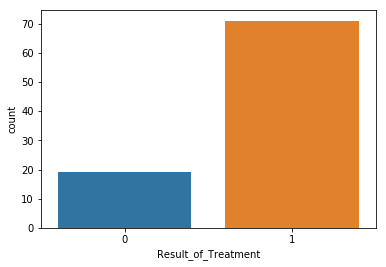

In [4]:
sns.countplot(data['Result_of_Treatment'],label="Sum")
data['Result_of_Treatment'].value_counts()
# We can use SMOTE algorithm for oversampling

In [5]:
pd.concat([data.groupby('Result_of_Treatment').mean(), data.groupby('Result_of_Treatment').mean().diff().dropna()]).T

Result_of_Treatment,0,1,1
sex,1.526316,1.549296,0.022980
age,35.473684,29.859155,-5.614529
Time,9.381579,6.654930,-2.726649
Number_of_Warts,6.526316,6.042254,-0.484062
Type,1.578947,1.746479,0.167532
Area,84.315789,98.746479,14.430689
induration_diameter,15.368421,14.056338,-1.312083


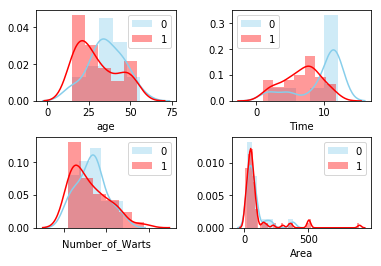

In [6]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
ax = sns.distplot( data[data['Result_of_Treatment'] == 0]['age'] , color="skyblue", label="0", ax = ax)
ax = sns.distplot( data[data['Result_of_Treatment'] == 1]['age'] , color="red", label="1", ax = ax)
ax.legend()
ax = fig.add_subplot(2, 2, 2)
ax = sns.distplot( data[data['Result_of_Treatment'] == 0]['Time'] , color="skyblue", label="0")
ax = sns.distplot( data[data['Result_of_Treatment'] == 1]['Time'] , color="red", label="1")
ax.legend()
ax = fig.add_subplot(2, 2, 3)
ax = sns.distplot( data[data['Result_of_Treatment'] == 0]['Number_of_Warts'] , color="skyblue", label="0")
ax = sns.distplot( data[data['Result_of_Treatment'] == 1]['Number_of_Warts'] , color="red", label="1")
ax.legend()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
ax = sns.distplot( data[data['Result_of_Treatment'] == 0]['Area'] , color="skyblue", label="0", ax = ax)
ax = sns.distplot( data[data['Result_of_Treatment'] == 1]['Area'] , color="red", label="1", ax = ax)
ax.legend()
plt.show()

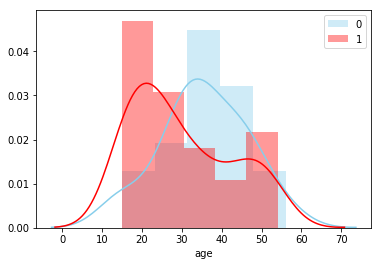

In [7]:
ax = sns.distplot( data[data['Result_of_Treatment'] == 0]['age'] , color="skyblue", label="0")
ax = sns.distplot( data[data['Result_of_Treatment'] == 1]['age'] , color="red", label="1")
ax.legend()

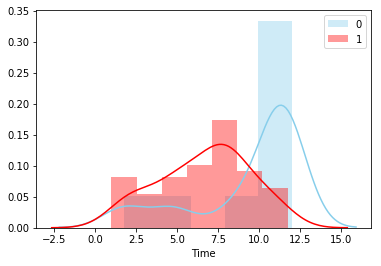

In [8]:
ax = sns.distplot( data[data['Result_of_Treatment'] == 0]['Time'] , color="skyblue", label="0")
ax = sns.distplot( data[data['Result_of_Treatment'] == 1]['Time'] , color="red", label="1")
ax.legend()

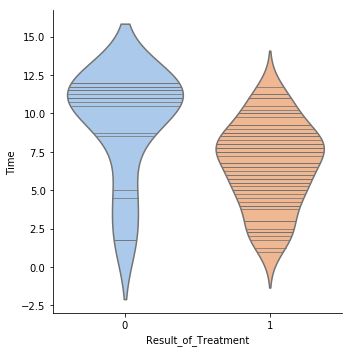

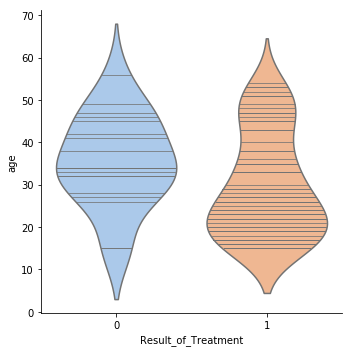

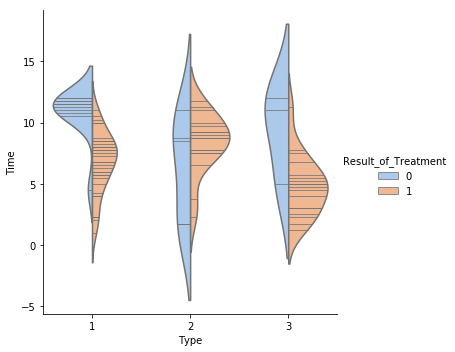

In [9]:
sns.catplot(x="Result_of_Treatment", y="Time", kind = 'violin', palette="pastel", inner="stick", data=data);
sns.catplot(x="Result_of_Treatment", y="age", kind = 'violin', palette="pastel", inner="stick", data=data);
sns.catplot(x="Type", y="Time", hue= 'Result_of_Treatment', kind = 'violin', palette="pastel", inner="stick", split=True, data=data);

In [10]:
corr = data.corr()
corr.T

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
sex,1.000000,0.043682,-0.014825,0.100785,-0.104623,-0.115664,0.015202,0.018831
age,0.043682,1.000000,0.188981,0.000092,-0.056636,-0.064334,-0.007005,-0.188314
Time,-0.014825,0.188981,1.000000,0.050800,-0.262870,-0.047254,-0.183656,-0.361172
Number_of_Warts,0.100785,0.000092,0.050800,1.000000,0.148047,-0.107528,0.062383,-0.047160
Type,-0.104623,-0.056636,-0.262870,0.148047,1.000000,-0.042080,0.205546,0.083396
Area,-0.115664,-0.064334,-0.047254,-0.107528,-0.042080,1.000000,0.119262,0.043349
induration_diameter,0.015202,-0.007005,-0.183656,0.062383,0.205546,0.119262,1.000000,-0.031273
Result_of_Treatment,0.018831,-0.188314,-0.361172,-0.047160,0.083396,0.043349,-0.031273,1.000000


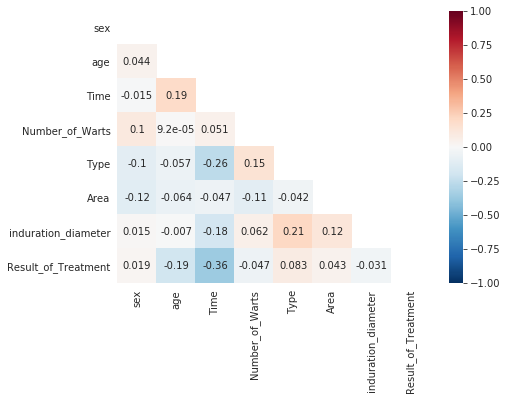

In [11]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, annot = True, 
                     vmin =-1, vmax =1, center = 0, 
                     xticklabels=corr.columns, cmap="RdBu_r")    

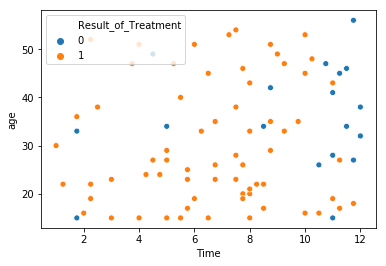

In [12]:
sns.scatterplot(x=data['Time'], y=data['age'], hue=data['Result_of_Treatment'])

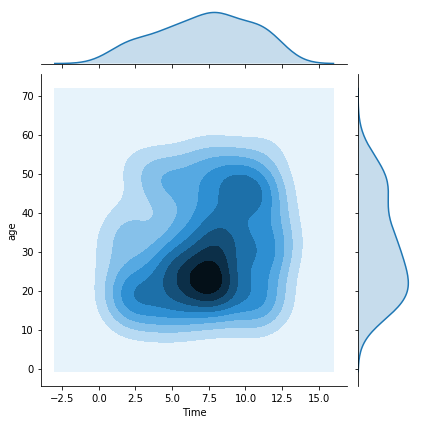

In [13]:
# 2D KDE plot
sns.jointplot(x=data['Time'], y=data['age'], kind="kde")

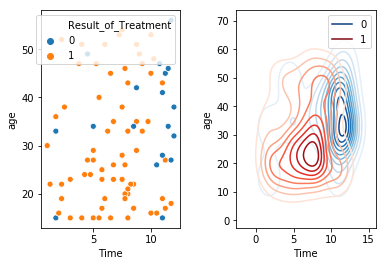

In [14]:
fig = plt.figure()
fig.subplots_adjust(hspace=1, wspace=.4)
ax = fig.add_subplot(1, 2, 1)
ax = sns.scatterplot(x=data['Time'], y=data['age'], hue=data['Result_of_Treatment'], ax = ax)
ax = fig.add_subplot(1, 2, 2)
successed = data.loc[data.Result_of_Treatment == 1]
failed = data.loc[data.Result_of_Treatment == 0]
ax = sns.kdeplot(failed.Time, failed.age,label ="0",cmap="Blues", ax=ax)
ax = sns.kdeplot(successed.Time, successed.age,label ="1", cmap="Reds", ax = ax)
ax.legend()
plt.show()


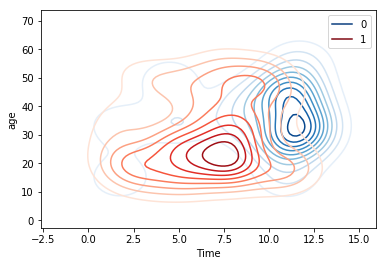

In [15]:
successed = data.loc[data.Result_of_Treatment == 1]
failed = data.loc[data.Result_of_Treatment == 0]
ax = sns.kdeplot(failed.Time, failed.age,label ="0",
                 cmap="Blues")
ax = sns.kdeplot(successed.Time, successed.age,label ="1",
                 cmap="Reds")
ax.legend()

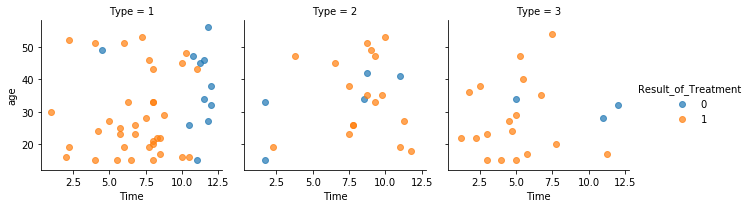

In [16]:
c = sns.FacetGrid(data, col="Type", hue="Result_of_Treatment")
c.map(plt.scatter, "Time", "age", alpha=.7)
c.add_legend();

In [17]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'Result_of_Treatment']
y = data.loc[:, 'Result_of_Treatment']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)
#train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

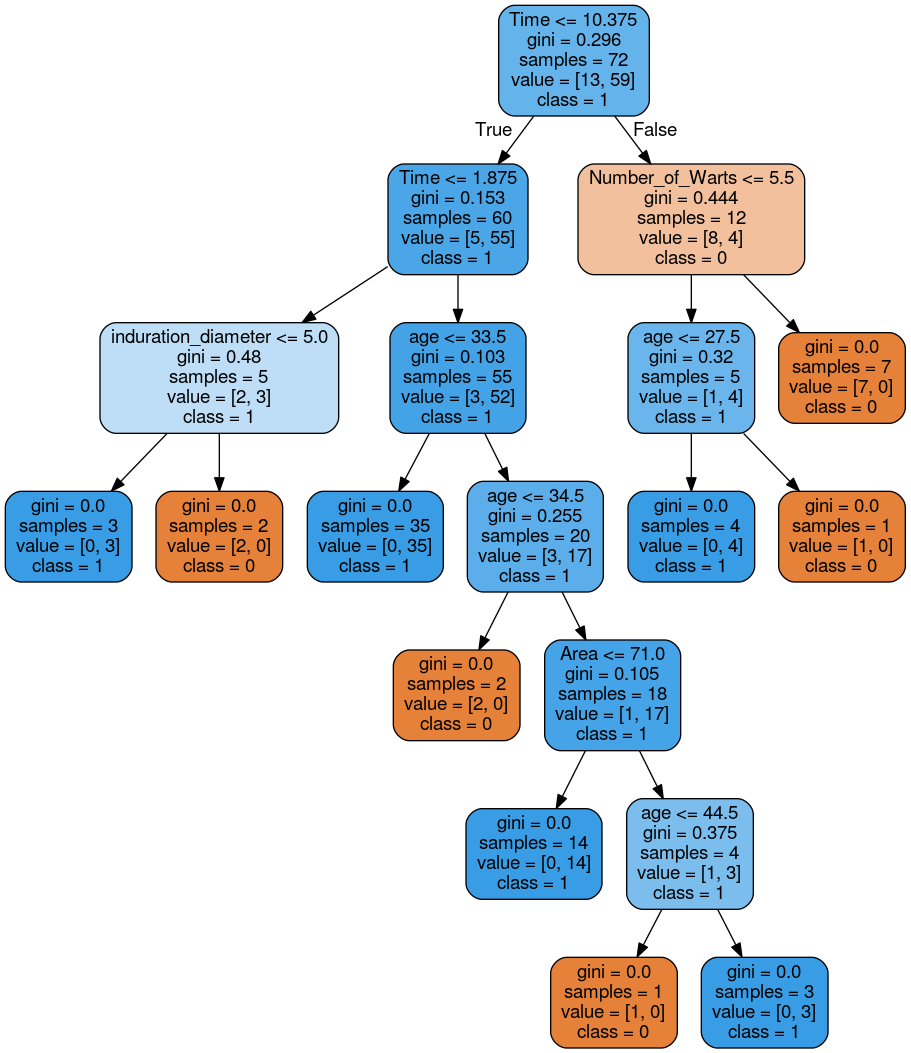

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
import graphviz
from IPython.display import Image  

decisionTreeModel = DecisionTreeClassifier(random_state=1)
decisionTreeModel.fit(train_X, train_y) 

dot_data = tree.export_graphviz(decisionTreeModel, out_file=None, 
    feature_names = train_X.columns.values.tolist(),  
    class_names= ['0','1'],  
    filled=True, 
    rounded=True
    )  
graph = graphviz.Source(dot_data) 
from IPython.display import SVG
Image(graph.pipe(format='png'))

In [19]:
from sklearn.model_selection import cross_validate
from sklearn import metrics

def scoringModel(model, train, y):
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(model, train, y, scoring=scoring, cv=5)
    return scores

def scoring(model):
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(model, train_X, train_y, scoring=scoring, cv=5)
    for metric_name in scores.keys():
        print('%s : %f' % (metric_name, scores[metric_name].mean()))
    return scores

scoreTreeModel = scoringModel(decisionTreeModel,train_X, train_y)
#scoreTreeModel = scoring(decisionTreeModel)

cnf_matrix = metrics.confusion_matrix(test_y, decisionTreeModel.predict(test_X))
cnf_matrix


array([[ 5,  1],
       [ 1, 11]])

In [20]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
scoreLR = scoring(LR)

data = {'Model' : ['Decision tree', 'Logistic regression']}

for metric_name in scoreTreeModel.keys():
    data[metric_name] = [scoreTreeModel[metric_name].mean(), scoreLR[metric_name].mean()]

df = pd.DataFrame(data) 
df.T

fit_time : 0.026944
score_time : 0.011242
test_accuracy : 0.805714
test_precision_macro : 0.463663
test_recall_macro : 0.515909
test_f1_weighted : 0.747332
test_roc_auc : 0.592677


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

,0,1
Model,Decision tree,Logistic regression
fit_time,0.00415163,0.0269445
score_time,0.00983,0.011242
test_accuracy,0.860952,0.805714
test_precision_macro,0.800524,0.463663
test_recall_macro,0.732576,0.515909
test_f1_weighted,0.856424,0.747332
test_roc_auc,0.732576,0.592677


In [21]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(train_X)
x_train_norm = std_scale.transform(train_X)
training_norm_X = pd.DataFrame(x_train_norm, index=train_X.index, columns=train_X.columns) 
print(training_norm_X.head())

x_test_norm = std_scale.transform(test_X)
testing_norm_X = pd.DataFrame(x_test_norm, index=test_X.index, columns=test_X.columns) 
print(testing_norm_X.head())

         sex       age      Time  Number_of_Warts      Type      Area  \
89  0.845154 -0.567469 -0.068053        -0.019511 -0.904534 -0.553681   
70 -1.183216  1.189854  0.333569        -1.190145 -0.904534 -0.265274   
53 -1.183216 -0.567469 -0.389350        -0.956018 -0.904534 -0.380637   
19  0.845154 -0.303870 -0.068053        -0.956018 -0.904534 -0.647413   
84  0.845154  2.068515  0.092596        -0.019511 -0.904534 -0.106650   

    induration_diameter  
89            -0.701163  
70            -0.640339  
53            -0.397044  
19            -0.457868  
84            -0.397044  
         sex       age      Time  Number_of_Warts      Type      Area  \
58  0.845154  2.332113  1.538435         0.214616 -0.904534 -0.467159   
78 -1.183216  1.189854  1.297462         0.214616 -0.904534  2.964882   
43 -1.183216  1.717050 -0.790972        -0.956018 -0.904534 -0.452739   
55 -1.183216  2.156381  0.172921         1.619377  1.507557 -0.380637   
87 -1.183216  1.453452  1.458111        

In [22]:
training_norm_X[["age","Time",'Type',"induration_diameter"]]

,age,Time,Type,induration_diameter
89,-0.567469,-0.068053,-0.904534,-0.701163
70,1.189854,0.333569,-0.904534,-0.640339
53,-0.567469,-0.389350,-0.904534,-0.397044
19,-0.303870,-0.068053,-0.904534,-0.457868
84,2.068515,0.092596,-0.904534,-0.397044
...,...,...,...,...
75,1.541318,0.735191,0.301511,-0.336220
9,0.223326,1.618759,1.507557,-0.518691
72,0.311193,-1.674540,0.301511,-0.397044
12,-1.270398,-1.674540,0.301511,-0.397044


In [23]:
scoreTree = scoringModel(decisionTreeModel, training_norm_X, train_y)
scoreLR = scoringModel(LR, training_norm_X, train_y)

data = {'Model' : ['Decision tree', 'Logistic regression']}
for metric_name in scoreTree.keys():
    data[metric_name] = [scoreTree[metric_name].mean(), scoreLR[metric_name].mean()]

df = pd.DataFrame(data) 
df.T

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
Model,Decision tree,Logistic regression
fit_time,0.00399671,0.00574617
score_time,0.00896344,0.010083
test_accuracy,0.860952,0.805714
test_precision_macro,0.800524,0.463663
test_recall_macro,0.732576,0.515909
test_f1_weighted,0.856424,0.747332
test_roc_auc,0.732576,0.57601


In [24]:
scoreTree = scoringModel(decisionTreeModel, training_norm_X[["age","Time",'Type',"induration_diameter"]], train_y)
scoreLR = scoringModel(LR, training_norm_X[["age","Time",'Type',"induration_diameter"]], train_y)

data = {'Model' : ['Decision tree', 'Logistic regression']}

for metric_name in scoreTree.keys():
    data[metric_name] = [scoreTree[metric_name].mean(), scoreLR[metric_name].mean()]

df = pd.DataFrame(data) 
df.T

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

,0,1
Model,Decision tree,Logistic regression
fit_time,0.00442405,0.00571394
score_time,0.0102416,0.010605
test_accuracy,0.890476,0.834286
test_precision_macro,0.876166,0.516044
test_recall_macro,0.791667,0.533333
test_f1_weighted,0.884416,0.766404
test_roc_auc,0.791667,0.713889


In [25]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = training_norm_X.columns
os_data_X,os_data_y=os.fit_sample(training_norm_X, train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

Using TensorFlow backend.


length of oversampled data is  118
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [26]:
import statsmodels.api as sm
logit_model=sm.Logit(train_y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.473337
         Iterations 6
                          Results: Logit
Model:               Logit               Pseudo R-squared: -0.002 
Dependent Variable:  Result_of_Treatment AIC:              82.1605
Date:                2020-02-19 17:05    BIC:              98.0972
No. Observations:    72                  Log-Likelihood:   -34.080
Df Model:            6                   LL-Null:          -34.001
Df Residuals:        65                  LLR p-value:      1.0000 
Converged:           1.0000              Scale:            1.0000 
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
sex                  0.9095   0.5196  1.7504 0.0800 -0.1089 1.9279
age                  0.0210   0.0270  0.7771 0.4371 -

In [27]:
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

def predict(features, weights):
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
  z = np.dot(features, weights)
  return sigmoid(z)

def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)
    #1 - Get Predictions
    predictions = predict(features, weights)
    #2 Transpose features from (200, 3) to (3, 200)
    gradient = np.dot(features.T,  predictions - labels)
    #3 Take the average cost derivative for each feature
    gradient /= N
    #4 - Multiply the gradient by our learning rate
    gradient *= lr
    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights
def decision_boundary(prob):
  return 1 if prob >= .5 else 0

def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  _decision_boundary = np.vectorize(decision_boundary)
  return _decision_boundary(predictions).flatten()

def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        #print (features)
        #print (weights)
        
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 100 == 0:
            print ("iter: {}  cost: {}".format(i, cost))

    return weights, cost_history

#CALCULATION
np.random.seed(0)
weights, cost_history = train(np.hstack((np.ones((train_y.count(),1)), train_X[['Time','age']].to_numpy())), 
      train_y.to_numpy(), 
      np.random.uniform(low=-1.0, high=1.0, size=3), 
      0.001, 1000)
possiblities = predict(np.hstack((np.ones((test_y.count(),1)),test_X[['Time','age']].to_numpy())), weights)
predictions = classify(possiblities)
possiblities

iter: 0  cost: 1.8732674100249116
iter: 100  cost: 0.6522403704435823
iter: 200  cost: 0.609406517463262
iter: 300  cost: 0.5777195777911466
iter: 400  cost: 0.5551677781320082
iter: 500  cost: 0.5395701581670956
iter: 600  cost: 0.5289746327726486
iter: 700  cost: 0.5218382544817948
iter: 800  cost: 0.517035287249884
iter: 900  cost: 0.5137841005838157


array([0.91247765, 0.86302594, 0.88388287, 0.90383659, 0.87641853,
       0.8686297 , 0.87525306, 0.88677657, 0.76272973, 0.87202524,
       0.73446078, 0.73545786, 0.88001441, 0.68269263, 0.73476951,
       0.81857725, 0.80640568, 0.69026978])

In [28]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))
accuracy(predictions, test_y)

0.6666666666666667

In [29]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()



In [30]:
logit_model=sm.Logit(train_y,train_X[['Time','age']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.513611
         Iterations 6
                         Results: Logit
Model:              Logit               Pseudo R-squared: -0.088 
Dependent Variable: Result_of_Treatment AIC:              77.9600
Date:               2020-02-19 17:05    BIC:              82.5134
No. Observations:   72                  Log-Likelihood:   -36.980
Df Model:           1                   LL-Null:          -34.001
Df Residuals:       70                  LLR p-value:      1.0000 
Converged:          1.0000              Scale:            1.0000 
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
Time       -0.0490     0.0813   -0.6029   0.5466   -0.2083   0.1103
age         0.0557     0.0225    2.4789   0.0132    0.0117

[ 7.62115459  1.19630112  3.53380644  9.25439181  7.11829494 -0.39419152
  3.67626798 -0.37559365  0.47366376  2.08654845  1.13644197  6.08890743
  2.7857832   1.05971955  1.69505192  1.57543423  6.26049188 -0.25166129
  1.43649462 -0.57743374 -2.44006216  2.28465414  3.54721625 -0.34424925
  8.87064814 -1.49925604  0.052488    0.36759527  6.33280528  5.99967363
  0.38881488  1.67442484 -1.09008555 -1.9712473  -0.53866597  0.82832586
  5.09413997  4.74702977 -0.2685248  -0.6302212  -1.49593024 -1.28820043
 -1.65626814  7.99361101  0.20529125 -0.15473046 -1.52664203  3.44506631
 -2.00867007 -0.35121566 -0.91593904  2.06161281 -0.73423158 -1.42856375
 -0.05771799  1.514284    0.60405967  0.88590814 -0.97856269 -0.49408718
 -0.82187018  0.21930645 -0.52832004 -1.70001723  0.34207391 -0.14847204
 -1.93026295  1.38769769 -0.55088943  0.30286437  3.1926199   0.61154994
  4.81465192 -1.4301335   1.29909371 -0.48033174 -1.11182005 -0.7857146
 -0.44821228  0.22990512 -1.27134801  3.19082056  1.

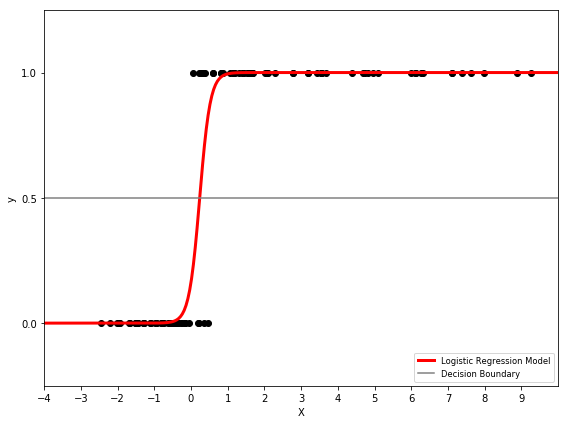

In [31]:
#import numpy as np
#import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
def drawSigmoidFunction(X, y) :
    # Fit the classifier
    clf = linear_model.LogisticRegression(C=1e5)
    clf.fit(X, y)

    # and plot the result
    plt.figure(1, figsize=(8, 6))
    plt.clf()
    plt.scatter(X.ravel(), y, color='black')
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)

    #ols = linear_model.LinearRegression()
    #ols.fit(X, y)
    #plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Decision Boundary'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()
    

    
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
print(X.ravel())
#drawSigmoidFunction(train_X.to_numpy(), train_y.to_numpy())
drawSigmoidFunction(X, y)



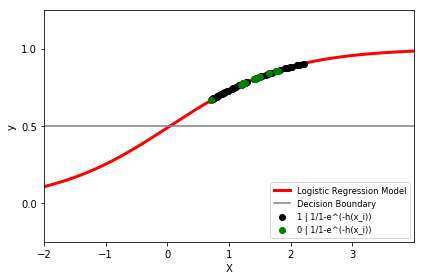

In [32]:
import numpy.ma as ma

z = np.dot(np.hstack((np.ones((train_y.count(),1)),train_X[['Time','age']].to_numpy())), weights)
predictions = predict(np.hstack((np.ones((train_y.count(),1)),train_X[['Time','age']].to_numpy())), weights)

mz = ma.masked_array(z, mask=train_y.to_numpy())
mpredictions = ma.masked_array(predictions, mask=train_y.to_numpy())

plt.scatter(z, predictions, color='black', zorder=20)
plt.scatter(mz, mpredictions, color='green', zorder=20)

X_test = np.linspace(-2, 4, 300)
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

loss = expit(X_test * clf.coef_*.15 + clf.intercept_ +1.6).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

#ols = linear_model.LinearRegression()
#ols.fit(X, y)
#plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)

plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-2, 4))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-2, 4)
plt.legend(('Logistic Regression Model', 'Decision Boundary', '1 | 1/1-e^(-h(x_i))', '0 | 1/1-e^(-h(x_i))'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'cost')

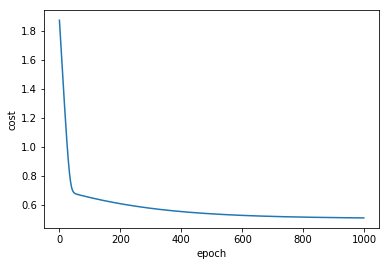

In [33]:
plt.plot(cost_history)
plt.xlabel('epoch')
plt.ylabel('cost')